# Spectrum Analyzer

Please follow the instructions on the pdf.
Run and compile the following 2 cells - DO NOT EDIT THEM!

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

In [2]:
# Pre-filled buffering function from 'Librosa'

def frame(y, frame_length=1024, hop_length=512):
    '''Slice a time series into overlapping frames.

    This implementation uses low-level stride manipulation to avoid
    redundant copies of the time series data.

    Parameters
    ----------
    y : np.ndarray [shape=(n,)]
        Time series to frame. Must be one-dimensional and contiguous
        in memory.

    frame_length : int > 0 [scalar]
        Length of the frame in samples

    hop_length : int > 0 [scalar]
        Number of samples to hop between frames

    Returns
    -------
    y_frames : np.ndarray [shape=(frame_length, N_FRAMES)]
        An array of frames sampled from `y`:
        `y_frames[i, j] == y[j * hop_length + i]`

    Raises
    ------
    ParameterError
        If `y` is not contiguous in memory, not an `np.ndarray`, or
        not one-dimensional.  See `np.ascontiguous()` for details.

        If `hop_length < 1`, frames cannot advance.

        If `len(y) < frame_length`.

    Examples
    --------
    Extract 2048-sample frames from `y` with a hop of 64 samples per frame

    >>> y, sr = librosa.load(librosa.util.example_audio_file())
    >>> librosa.util.frame(y, frame_length=2048, hop_length=64)
    array([[ -9.216e-06,   7.710e-06, ...,  -2.117e-06,  -4.362e-07],
           [  2.518e-06,  -6.294e-06, ...,  -1.775e-05,  -6.365e-06],
           ...,
           [ -7.429e-04,   5.173e-03, ...,   1.105e-05,  -5.074e-06],
           [  2.169e-03,   4.867e-03, ...,   3.666e-06,  -5.571e-06]], dtype=float32)

    '''

    if not isinstance(y, np.ndarray):
        raise ParameterError('Input must be of type numpy.ndarray, '
                             'given type(y)={}'.format(type(y)))

    if y.ndim != 1:
        raise ParameterError('Input must be one-dimensional, '
                             'given y.ndim={}'.format(y.ndim))

    if len(y) < frame_length:
        raise ParameterError('Buffer is too short (n={:d})'
                             ' for frame_length={:d}'.format(len(y), frame_length))

    if hop_length < 1:
        raise ParameterError('Invalid hop_length: {:d}'.format(hop_length))

    if not y.flags['C_CONTIGUOUS']:
        raise ParameterError('Input buffer must be contiguous.')

    # Compute the number of frames that will fit. The end may get truncated.
    n_frames = 1 + int((len(y) - frame_length) / hop_length)

    # Vertical stride is one sample
    # Horizontal stride is `hop_length` samples
    y_frames = np.lib.stride_tricks.as_strided(y, shape=(frame_length, n_frames),
                          strides=(y.itemsize, hop_length * y.itemsize))
    return y_frames

# PART 1

-  Fill the skeleton functions below with the correct code
-  Generate a matrix that contains snapshots in time of a signal's the frequency content.


In [3]:
def spectrum(x, sr, frame_size, window):
    '''
    x: signal data array (must be mono!)
    sr: sampling frequency
    frame_size: length of buffer frames and window (in samples)
    '''
#Important Note: All your comments should be in the context of DST and limited to general coding.
#Example: Comment what the following line is doing:

#b = np.fft.fft(x)

    #True but general answer: Calling a function named fft on 'x' and placing it in the variable 'b'.
    #Correct answer: Performing a full Fourier Transform on the input audio of the function and storing the complex coefficients in 'b'

#Your assignment starts here:
    
#Comment in the context of the excercise what frame is doing below.
    #It is taking the audio signal x and breaking it into segments of size frame_size and putting them into the columns of a matrix with a 50% overlap between segments such that every subsequent column, or frame of audio, of the matrix begins halfway through the preceding column. This smooths the transitions between frames in the spectogram.
    if window == 'rect':  
        num_columns = int(np.ceil((len(x)/frame_size)))
        matrix = np.zeros([frame_size,num_columns])
        
        for i in range(num_columns):
            if len(x[i*frame_size:(i*frame_size)+frame_size]) != frame_size:
                matrix[:,i] += np.pad(x[i*frame_size:(i*frame_size)+frame_size],(0,(frame_size*num_columns) - (len(x))))
            else:
                matrix[:,i] += x[i*frame_size:(i*frame_size)+frame_size]
    else:
        matrix = frame(x,frame_size,int(frame_size/2))

#Explain, in the context of the spectrogram, the inputs of the 'zeros' function (i.e.frame_size,np.shape(matrix)[1])
    #Answer: The frame_size determines the number of rows per column, and the size of matrix index 1 is the number of columns in the matrix. Frame_size in the context of the spectogram is the chunk of audio on which a Fourier Transform is performed and then displayed in the spectogram, and the columns (matrix shape index 1) represent the horizontal resolution of the spectogram, that is to say the number of frames that will be displayed.
    
    b = np.zeros([frame_size,np.shape(matrix)[1]])
    
#Explain the range of the loop in the context of the spectrogram
    #The range is defined by the number of frames you are analyzing, which is the x-axis of the spectogram. This number is given by the number of columns in our matrix, which is dimension index 1.
    for i in range(0,np.shape(matrix)[1]):
        
# Explain, in the context of the spectrogram, what the following is doing and how it is doing it.
    #This is windowing every frame of audio from index 0 through the range of the columns present in the matrix, which equals the number of frames that will be plotted on the spectogram.
        if window == 'hann':
            b[:,i] = matrix[:,i]*np.hanning(frame_size)
        elif window == 'hamm':
            b[:,i] = matrix[:,i]*np.hamming(frame_size)
        elif window == 'bm':
            b[:,i] = matrix[:,i]*np.blackman(frame_size)
        elif window == 'rect':
            b[:,i] = matrix[:,i]*np.ones(frame_size)
        else: 
            print('Please choose "hann" or "hamm" or "bm" or "rect"')
            break

#Comment why we need to take the absolute of the fft
    #This eliminates the phase portion of the complex coefficients given by the Fourier Transform and gives us just the magnitude spectrum, which is what we need to properly plot the spectogram.
    y_f = np.abs(np.fft.fft(b,axis = 0))
    y = 20*np.log10(y_f/1)

# Explain, in the context of DST, why the frequency vector is defined using (0,sr,sr/np.shape(matrix)[0])
    #sr represents the full range of frequecies given by the FFT, and it is divided np.shape(matrix)[0] because that is the size of each frame. This defines the resolution of the spectogram's frequency axis and so we must use it to divide the sample rate of said axis, which is the sample rate.
# Explain, in the context of DST, why the time vector is defined using (0,len(x)/sr,len(x)/sr/np.shape(matrix)[1])
    #len(x)/sr is needed because number of samples divided by samples per second leaves you with the duration of the audio file in seconds. The step size of len(x)/sr/np.shape(matrix)[1] is needed because it divides the duration of the audio file by the number of columns because that is how many spaces will be needed to display all the frames. It gives us the resolution of that axis as well.
    
    f_vector = np.arange(0,sr,sr/np.shape(matrix)[0])
    t_vector = np.arange(0,len(x)/sr,len(x)/sr/np.shape(matrix)[1])
    return y, f_vector, t_vector

(0.0, 22050.0)

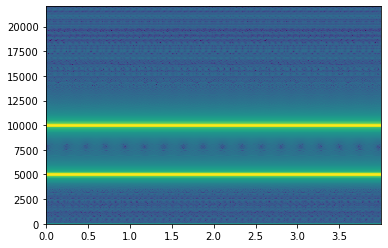

In [4]:
x,sr = sf.read('AudioA2.wav')

y,f,t = spectrum(x,sr,512,'hann')

plt.pcolormesh(t,f,y,shading = 'nearest')

# Explain, in the context of DST, why the following line is required
    #Because it scales the y-axis displaying frequency to show only those frequencies below the Nyquist frequency, thereby eliminating redundant frequencies that are filtered out anyway to avoid aliasing.
plt.ylim([0,sr/2])

# PART 1.1

-  Plot the provided signal in subplots showing the different windows (Hanning, Hamming, Blackman, Rectangular).

(0.0, 22050.0)

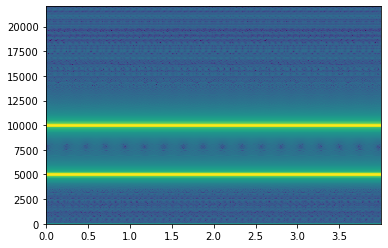

In [5]:
y,f,t = spectrum(x,sr,512,'hann')
plt.pcolormesh(t,f,y,shading = 'nearest')
plt.ylim([0,sr/2])

(0.0, 22050.0)

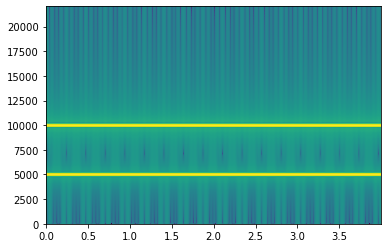

In [6]:
y,f,t = spectrum(x,sr,512,'hamm')
plt.pcolormesh(t,f,y,shading = 'nearest')
plt.ylim([0,sr/2])

(0.0, 22050.0)

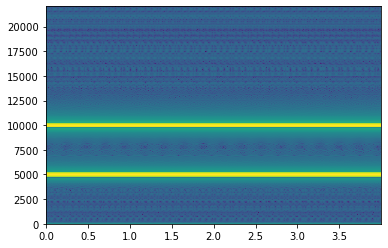

In [7]:
y,f,t = spectrum(x,sr,512,'bm')
plt.pcolormesh(t,f,y,shading = 'nearest')
plt.ylim([0,sr/2])

(0.0, 22050.0)

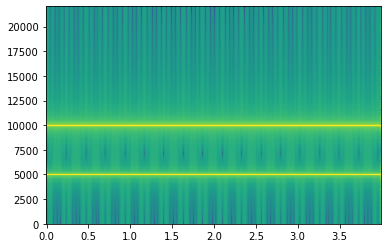

In [8]:
y,f,t = spectrum(x,sr,512,'rect')
plt.pcolormesh(t,f,y,shading = 'nearest')
plt.ylim([0,sr/2])

# Extra Credit

In [9]:
def spectrum_ec(x, sr, frame_size, window, fft_length):
    '''
    x: signal data array (must be mono!)
    sr: sampling frequency
    frame_size: length of buffer frames and window (in samples)
    fft_length: size of the fft - zero padding (optional, see Extra Credit)
    '''
    
    if window == 'rect':  
        num_columns = int(np.ceil((len(x)/frame_size)))
        matrix = np.zeros([frame_size,num_columns])
        
        for i in range(num_columns):
            if len(x[i*frame_size:(i*frame_size)+frame_size]) != frame_size:
                matrix[:,i] += np.pad(x[i*frame_size:(i*frame_size)+frame_size],(0,(frame_size*num_columns) - (len(x))))
            else:
                matrix[:,i] += x[i*frame_size:(i*frame_size)+frame_size]
    else:
        matrix = frame(x,frame_size,int(frame_size/2))
    
    b = np.zeros([frame_size,np.shape(matrix)[1]])
    
    if fft_length > frame_size:
        pad = np.zeros([fft_length-frame_size])
        b2 = np.zeros([frame_size+len(pad),np.shape(matrix)[1]])
    
    for i in range(0,np.shape(matrix)[1]):
    
        if window == 'hann':
            b[:,i] = matrix[:,i]*np.hanning(frame_size)
        elif window == 'hamm':
            b[:,i] = matrix[:,i]*np.hamming(frame_size)
        elif window == 'bm':
            b[:,i] = matrix[:,i]*np.blackman(frame_size)
        elif window == 'rect':
            b[:,i] = matrix[:,i]*np.ones(frame_size)
        else: 
            print('Please choose "hann" or "hamm" or "bm" or "rect"')
            break
        
        if fft_length > frame_size:
            b2[:,i] = np.hstack([b[:,i],pad])

    if fft_length > frame_size:
        y_f = np.abs(np.fft.fft(b2,axis = 0))
        y = 20*np.log10(y_f/1)
        f_vector = np.arange(0,sr,sr/np.shape(b2)[0])
        t_vector = np.arange(0,len(x)/sr,len(x)/sr/np.shape(b2)[1])
    else:
        y_f = np.abs(np.fft.fft(b,axis = 0)) 
        y = 20*np.log10(y_f/1)
        f_vector = np.arange(0,sr,sr/np.shape(b)[0])
        t_vector = np.arange(0,len(x)/sr,len(x)/sr/np.shape(b)[1])
    
    return y, f_vector, t_vector

(0.0, 22050.0)

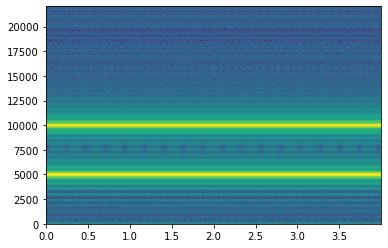

In [10]:
y,f,t = spectrum_ec(x,sr,512,'hann',1024)
plt.pcolormesh(t,f,y,shading = 'nearest')
plt.ylim([0,sr/2])